Lab Visualization

In the attachment, you will find a csv file named “forestfires.csv”. You can also
find the description of this dataset at the url below:
https://archive.ics.uci.edu/ml/datasets/Forest+Fires
Load the data, and plot the following figure.
1. Create a 2-by-2 subplot, and plot the histogram of the following columns:
wind speed, rain amount, temperature and relative humidity (column RH in
the data file). You need to slightly change the code in class so that subplots
are not sharing x-axis range.
2. Create a joint distribution between relative humidity and temperature
3. Create a figure showing how the average temperature is changing across
days of a week
4. Create a figure demonstrate how temperature is changing across month of
the year.
5. For question 3 and 4, you may notice that the labels on the axis are not in the
right order. Explore by yourself to see how to can make sure the order of the
axis follows the correct order, such as Jan, Feb, Mar, Apr,….,Dec.
6. Visually demonstrate the relationship between number of fires per month
and the average temperature of this month. Notice that you may need to
process the data in certain way to draw such figure

/var/folders/qd/7t020qr11875pm2n30bpv60m0000gn/T/ipykernel_25360/2076234811.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x= df2["day"], y= df2["temp"], s=200, cmap="Blues", alpha=0.4, edgecolors="grey")


<AxesSubplot: xlabel='#Fire', ylabel='temp'>

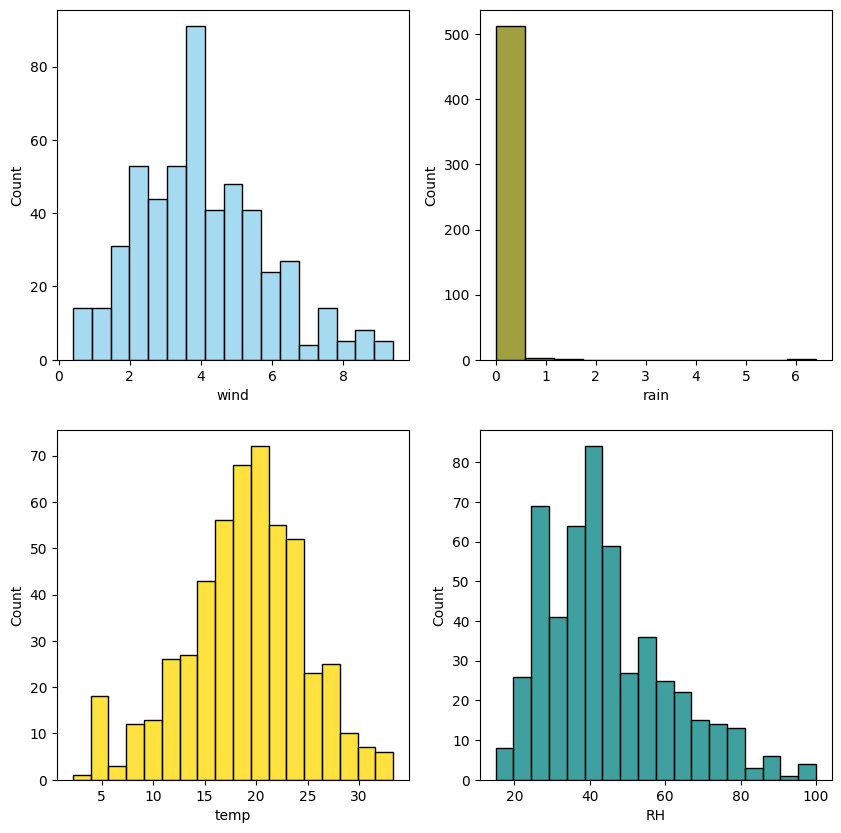

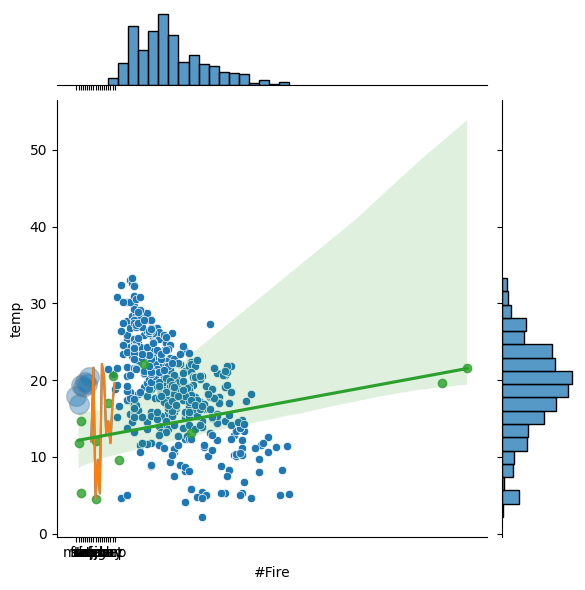

In [12]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("/Users/liza/Desktop/IDS400 A&L/Assignments/forestfires.csv")

df.head(5)

f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False) 
sns.histplot( df["wind"], color="skyblue", ax=axes[  0, 0])
sns.histplot( df["rain"], color="olive", ax=axes[0, 1]) 
sns.histplot( df["temp"], color="gold", ax=axes[1, 0]) 
sns.histplot( df["RH"], color="teal", ax=axes[1, 1])

sns.jointplot(x=df["RH"], y=df["temp"], kind = 'scatter')

df2=df.groupby("day")["temp"].aggregate("mean") 
df2= pd.DataFrame(df2)
df2.reset_index(inplace=True) 
df2.head(5)

plt.scatter(x= df2["day"], y= df2["temp"], s=200, cmap="Blues", alpha=0.4, edgecolors="grey")

df3= df.groupby("month")["temp"].aggregate("mean")
df3= pd.DataFrame(df3) 
df3.reset_index(inplace=True) 
df3.head(5)

sns.lineplot(x="month", y="temp", data=df3)

df3['month_c'] = pd.Categorical(df3['month'], ["jan", "feb", "mar", "apr", "may", "jun", "jul",  "aug", "sep", "oct", "nov", "dec"]) 
df3.head(5)

g = sns.lineplot(data = df3, x = 'month_c', y = "temp")

df4 = df.groupby("month")["month"].aggregate("count") 
df4= pd.DataFrame(df4)
df4.rename(columns={"month": "#Fire"}, inplace=True) 
df4.reset_index()

final= df4.merge(df3, on="month") 
final.head()

sns.regplot(x= final["#Fire"], y = final["temp"])